In [8]:
from configurations import load_data , make_params_dict, create_fig, set_font_sizes, apply_general_styles
apply_general_styles()

In [9]:
# Parameters
d = 200                  # Input dimension
tch_act = 'tanh'        # Activation function for teacher
std_act = 'tanh'        # Activation function for student
n_train = 1000          # Number of training samples
n_test = 100           # Number of test samples
bs = 10                # Batch size for training
opt = 'SGD'             # Type of optimizer: SGD, adam, or SAM
eps = 0.0               # Noise level for labels
q = 2.0                 # q-norm for SAM
rho = 0.1               # Radius for SAM
nprints = 20            # Number of prints during training
lr = 0.1                # Learning rate

opts = ['SGD', 'SAM']

summary = {}
for opt in opts:
    fix_names = ['d','tch_act','std_act','n_train','n_test']
    var_names = ['bs','opt','lr','q','rho']
    params = make_params_dict(fix_names, var_names)
    summary[opt] = load_data('first_tests',experiment_name='compare_optimizers', params=params)

for key in summary[opt].keys():
    print(f"{key}: {summary[opt][key].shape}")

File first_tests_bs10_lr0.1_optSGD_q2_rho0.1.pkl loaded with pickle.load from c:\Users\crise\OneDrive - SISSA\Documents\SISSA\SISSA 2nd YEAR\SAM\data\compare_optimizers\d200_n_test100_n_train1000_std_acttanh_tch_acttanh
File first_tests_bs10_lr0.1_optSAM_q2_rho0.1.pkl loaded with pickle.load from c:\Users\crise\OneDrive - SISSA\Documents\SISSA\SISSA 2nd YEAR\SAM\data\compare_optimizers\d200_n_test100_n_train1000_std_acttanh_tch_acttanh
step: (21,)
train_loss: (21,)
test_loss: (21,)
overlap: (21,)
norm_student: (21,)


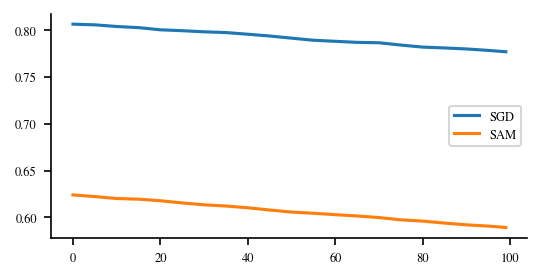

In [14]:
# Parameters
set_font_sizes(conf='tight')

fig , axes = create_fig()

ax = axes

for opt in opts:
    data = summary[opt]
    steps = data['step']
    train_loss = data['train_loss']
    test_loss = data['test_loss']
    overlap = data['overlap']
    norm_student = data['norm_student']

    ax.plot(steps, test_loss, label=f'{opt}')
ax.legend()